# Notebook for the analysis of XPS data 

Analysis of `dati/Coin_Al_50V_fullspctra.csv`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from arpes.io import load_data
import xarray as xr


/Users/a129544/anaconda3/envs/XPS/lib/python3.8/site-packages/arpes/config.py:54: UserWarning: Could not find local configuration file. If you don't have one, you can safely ignore this message.
  warnings.warn(msg)


Activating auto-logging. Current session state plus future input saved.
Filename       : logs/unnamed_2023-06-29_15-52-00.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


In [2]:
def load_csv_datatype(path_to_file: str = None, 
                      df = None,
                      n_scans: int= 1,
                      energy_key: str = 'Energy(meas)',
                      dim_name: str = 'eV') -> xr.DataArray:
    """
    This function load a dataset in the csv format using pandas.
    the number of scans need to be manually insered. 
    If multiple scans are present the mean is considered 
    """
    if path_to_file is not None:
        df = pd.read_csv(path_to_file, skiprows=1, sep='\t')
    elif df is not None:
        df=df
    else:
        print('One of path_to_file or df need to be specified')
        return 0

    scan_list = [f'Scan{i}' for i in range(1,n_scans+1)]
    loaded_data = df[scan_list].mean(axis=1).to_numpy()
    
    #loaded_data = [df[key].to_numpy().T for key in scan_list]

    coords = {dim_name : df[energy_key].to_numpy()}

    return xr.DataArray(
        loaded_data,
        coords=coords,
        dims=dim_name,
        # attrs={...} <- attributes here
    )

# Load datas 
In  order to load the datas and to insert them in the `xr.DataArray` object we use a custom function. 
First we analyze the datas importing them with pandas, then we can load them using the function `load_csv_datatype`. This function allow to load datas in the correct format for the successives analysis.

In [3]:
data_path = 'dati/Coin_Al_50V_fullspctra.csv'

df = pd.read_csv(data_path, skiprows=1, sep='\t')
df

,Energy(calc),Energy(meas),Sum,Scan1
0,1500.0,1482.95,222,222
1,1499.5,1483.52,155,155
2,1499.0,1482.29,153,153
3,1498.5,1482.29,116,116
4,1498.0,1481.00,126,126
...,...,...,...,...
2596,202.0,201.67,3125,3125
2597,201.5,200.44,3044,3044
2598,201.0,200.44,3228,3228
2599,200.5,199.22,3053,3053


In [4]:
fermi_energy = 1477.61674 #+/- 0.50422479

df['BindingEnergy'] = fermi_energy - df['Energy(meas)']

df

,Energy(calc),Energy(meas),Sum,Scan1,BindingEnergy
0,1500.0,1482.95,222,222,-5.33326
1,1499.5,1483.52,155,155,-5.90326
2,1499.0,1482.29,153,153,-4.67326
3,1498.5,1482.29,116,116,-4.67326
4,1498.0,1481.00,126,126,-3.38326
...,...,...,...,...,...
2596,202.0,201.67,3125,3125,1275.94674
2597,201.5,200.44,3044,3044,1277.17674
2598,201.0,200.44,3228,3228,1277.17674
2599,200.5,199.22,3053,3053,1278.39674


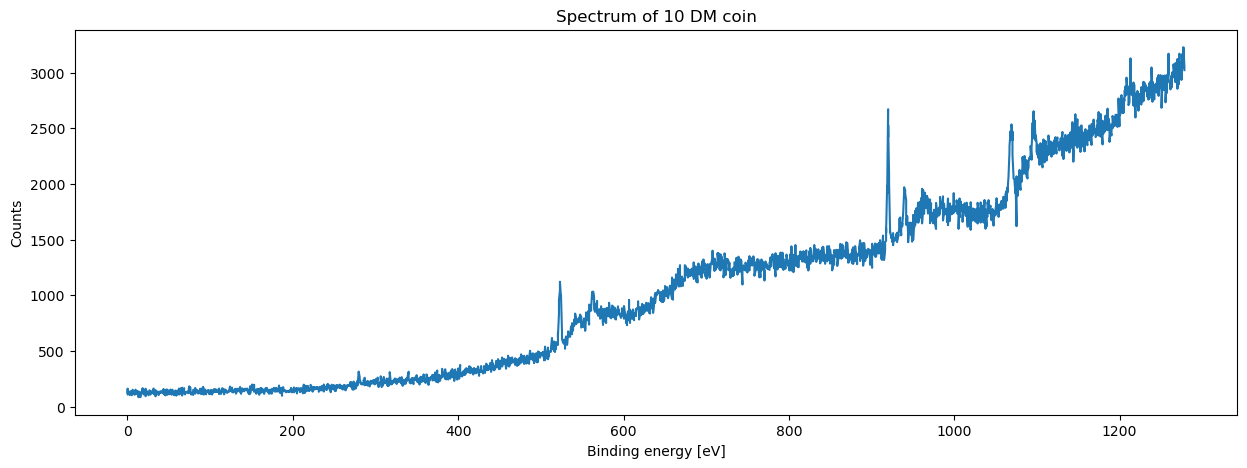

In [5]:
#df.plot('Energy(meas)', 'Sum')
# plt.show()

positive_mask = np.where(df['BindingEnergy'].to_numpy()>=0)

be = df['BindingEnergy'].to_numpy()[positive_mask]
count = df['Scan1'].to_numpy()[positive_mask]

fig = plt.figure(figsize=(15,5))
plt.plot(be,count)
plt.title('Spectrum of 10 DM coin')
plt.xlabel('Binding energy [eV]')
plt.ylabel('Counts')
plt.show()

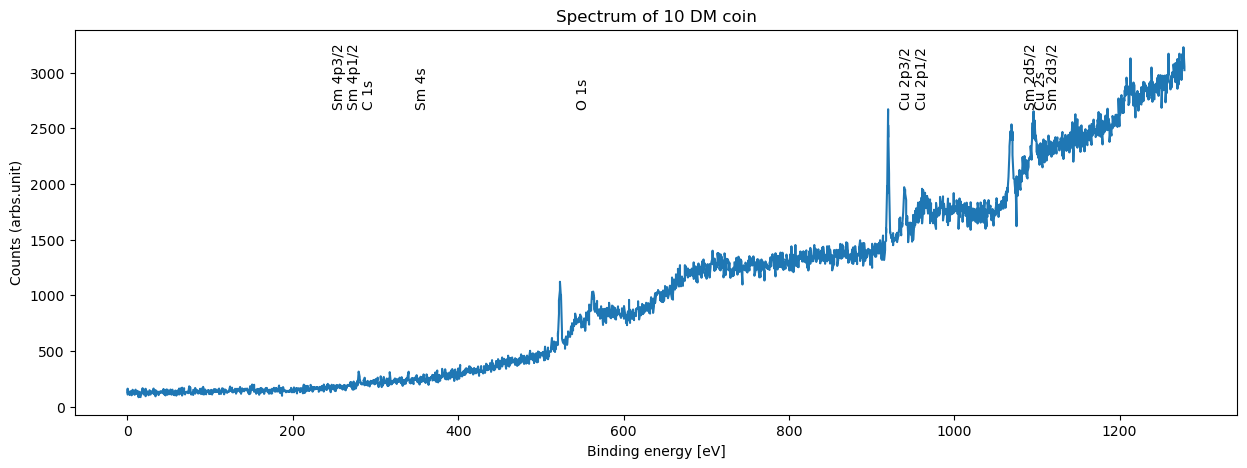

In [6]:
shift = 0#20


positive_mask = np.where(df['BindingEnergy'].to_numpy()>=0)

be = df['BindingEnergy'].to_numpy()[positive_mask]
count = df['Scan1'].to_numpy()[positive_mask]

fig = plt.figure(figsize=(15,5))
plt.plot(be+shift,count)

# Cu
plt.text(952.3, 2700, 'Cu 2p1/2', rotation='vertical')
plt.text(932.7, 2700, 'Cu 2p3/2', rotation='vertical')
plt.text(1096.7, 2700, 'Cu 2s', rotation='vertical')
# C
plt.text(284.2, 2700, 'C 1s', rotation='vertical')
# Fe
# plt.text(706.8, 2700, 'Fe 2p3/2', rotation='vertical')
# plt.text(719.9, 2700, 'Fe 2p1/2', rotation='vertical')
# plt.text(844.6, 2700, 'Fe 2s', rotation='vertical')
# Sn
# plt.text(884.7, 2700, 'Sn 3d5/2', rotaSn 3s', rotation='vertical')
# plt.text(756.5, 2700, 'Sn 3p1/2', rotation='vertical')
# plt.text(714.6, 2700, 'Sn 3p3/2', rotation='vertical')
# plt.text(493.2, 2700, 'Sn 3d3/2', rotation='vertical')
# plt.text(484.9, 2700, tion='vertical')
# Zn
# plt.text(1044.9, 2700, 'Zn 2p1/2', rotation='vertical')
# plt.text(1021.8, 2700, 'Zn 2p3/2', rotation='vertical')
# Ag
# plt.text(719.0, 2700, 'Ag 3s', rotation='vertical')
# plt.text(603.8, 2700, 'Ag 3p1/2', rotation='vertical')
# plt.text(573.0, 2700, 'Ag 3p3/2', rotation='vertical')
# plt.text(374.0, 2700, 'Ag 3d3/2', rotation='vertical')
# plt.text(368.0, 2700, 'Ag 3d5/2', rotation='vertical')
# Pb
# plt.text(671.6, 2700, 'Pb 3s', rotation='vertical')
# plt.text(559.9, 2700, 'Pb 3p1/2', rotation='vertical')
# plt.text(532.3, 2700, 'Pb 3p3/2', rotation='vertical')
# plt.text(340.5, 2700, 'Pb 3d3/2', rotation='vertical')
# plt.text(335.2, 2700, 'Pb 3d5/2', rotation='vertical')
# Ni
# plt.text(852.7, 2700, 'Ni 2p3/2', rotation='vertical')
# plt.text(870.0, 2700, 'Ni 2p1/2', rotation='vertical')
# plt.text(1008.6, 2700, 'Ni 2s', rotation='vertical')
# O
plt.text(543.1, 2700, 'O 1s', rotation='vertical')
# Ga
# plt.text(1143.2, 2700, 'Ga 2p1/2', rotation='vertical')
# plt.text(1116.4, 2700, 'Ga 2p3/2', rotation='vertical')
# Sm
plt.text(1083.4, 2700, 'Sm 2d5/2', rotation='vertical')
plt.text(1110.9, 2700, 'Sm 2d3/2', rotation='vertical')
plt.text(347.2, 2700, 'Sm 4s', rotation='vertical')
plt.text(265.6, 2700, 'Sm 4p1/2', rotation='vertical')
plt.text(247.6, 2700, 'Sm 4p3/2', rotation='vertical')

plt.title('Spectrum of 10 DM coin')
plt.xlabel('Binding energy [eV]')
plt.ylabel('Counts (arbs.unit)')
plt.show()

### Value of fitted picks and parameters
- Fermi energy 1477.6 +- 0.5 eV
Main picks:
- Pick_1 279.9 +- 1.4 eV    (C)
- Pick_2 523.2 +- 1.5 eV    (O)
- Pick_3 920.1 +- 1.4 eV    (Cu)
- Pick_4 940.2 +- 1.8 eV    (Cu)
- Pick_5 1068.3 +- 2.5 eV   (Cu?)
- Pick_6 1095.8 +- 2.6 eV   (?)

For Sm:
- 339.6 +- 0.7 eV
- 239 +- 14 eV
- 209 +- 7 eV

2s Cu:
- 1084 +- 5

 



In [80]:
# Save nev csv file for spectra analisis

df[['Energy(meas)', 'Scan1']].to_csv('dati/Coin_MG_50V_binding1.csv', index=False)

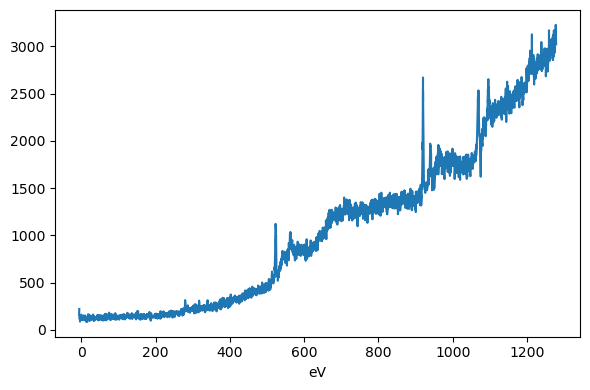

In [81]:
data = load_csv_datatype(df=df, energy_key='BindingEnergy', n_scans=1)

# Plot datas
fig, axes = plt.subplots(1, 1, figsize=(6,4))

#data.sum("eV").S.plot(ax=axes)
data.S.plot(ax=axes)

plt.tight_layout()

# Curve fitting 

First let's try just to fit the model without subtract the background 

/var/folders/lg/r7smz1g54tj4bqh1js51y8kc0000gn/T/ipykernel_33046/2575614342.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  selection = df['BindingEnergy'].between(1077, 1090, inclusive=False).to_numpy()


name,value,min,max,stderr,vary,expr,brute_step
a_amplitude,1739.420,-inf,inf,297.667,True,,
a_center,1084.031,-inf,inf,0.766,True,,
a_fwhm,10.736,-inf,inf,2.388,False,2.3548200*a_sigma,
a_height,152.199,-inf,inf,20.852,False,"0.3989423*a_amplitude/max(1e-15, a_sigma)",
a_sigma,4.559,0.000,inf,1.014,True,,


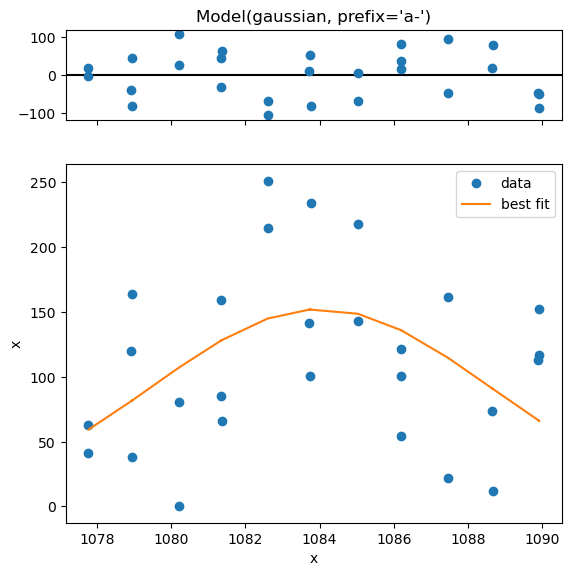

In [100]:
from arpes.fits.fit_models import GaussianModel, AffineBackgroundModel, LorentzianModel, VoigtModel
from arpes.analysis.shirley import remove_shirley_background, calculate_shirley_background_full_range
from arpes.fits.utilities import result_to_hints
#test_curve = data.spectrum.where(ws2_mask & ~wide_peak_mask).mean(["x", "y"]).sel(eV=slice(-36, -31))

# Selection
selection = df['BindingEnergy'].between(1077, 1090, inclusive=False).to_numpy()

test_curve = data.sel(eV=selection)
test_curve = test_curve - calculate_shirley_background_full_range(test_curve, max_iters=100)

test_model =  GaussianModel(prefix="a_") #+ GaussianModel(prefix="b_")

result = test_model.guess_fit(
    test_curve - test_curve.min(),
    # params={
    #     "a_center": {"value": 653, "max":655, "min":651 },
    #     "a_amplitude": {"min": 0},
    #     "b_center": {"value": 683, "max":687, "min":680},
    #     "b_amplitude": {"min": 0},
    # }
)
result.plot()
result